In [1]:
import pandas as pd

In [6]:
df=pd.read_csv("/Users/sanjay/Documents/GitHub/Dataset/Diamonds.csv")

In [7]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [9]:
df.color.value_counts()

G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64

In [10]:
from sklearn.preprocessing import OrdinalEncoder

In [11]:
oec=OrdinalEncoder()

In [13]:
df.color=oec.fit_transform(df[["color"]])

In [16]:
oec.categories_

[array(['D', 'E', 'F', 'G', 'H', 'I', 'J'], dtype=object)]

In [36]:
oec.inverse_transform([[0],[1],[2],[3],[4],[5],[6]])

array([['D'],
       ['E'],
       ['F'],
       ['G'],
       ['H'],
       ['I'],
       ['J']], dtype=object)

In [37]:
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,1.0,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,1.0,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,1.0,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,5.0,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,6.0,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,0.0,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,0.0,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,0.0,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,4.0,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [45]:
df.clarity=oec.fit_transform(df[["clarity"]])

In [47]:
x=df.drop(["cut"],axis=1)

In [49]:
df.cut.value_counts()

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

In [50]:
from sklearn.preprocessing import LabelEncoder

In [51]:
lec=LabelEncoder()

In [54]:
df.cut=lec.fit_transform(df.cut)

In [85]:
y=df.cut

In [86]:
from sklearn.ensemble import RandomForestClassifier

In [96]:
model=RandomForestClassifier(n_estimators=2000)

In [97]:
from sklearn.model_selection import train_test_split

In [98]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [99]:
model.fit(x_train,y_train)

RandomForestClassifier(n_estimators=2000)

In [103]:
y_pred=model.predict(x_test)

In [104]:
model.score(x_test,y_test)

0.7843282659745396

In [105]:
from sklearn.metrics import accuracy_score

In [106]:
accuracy_score(y_pred,y_test)

0.7843282659745396

In [108]:
from sklearn.metrics import confusion_matrix

In [113]:
import seaborn as ssn
import matplotlib.pyplot as plt
%matplotlib inline

In [114]:
cf=confusion_matrix(y_pred,y_test)

Text(42.0, 0.5, 'prediction')

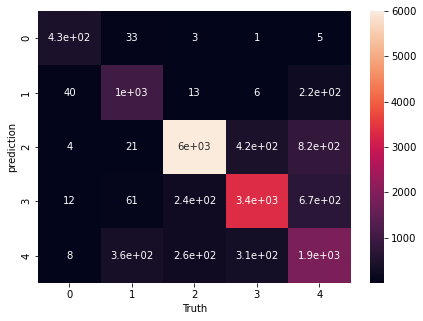

In [124]:
plt.figure(figsize=(7,5))
ssn.heatmap(cf,annot=True)
plt.xlabel("Truth")
plt.ylabel("prediction")


In [125]:
from sklearn.svm import SVC

In [129]:
model2=SVC(C=10)

In [130]:
model2.fit(x_train,y_train)

SVC(C=10)

In [131]:
model2.score(x_test,y_test)

0.40470893585465334